In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
data=data.drop(['id','date'],axis=1)

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
data['bathrooms']=data['bathrooms'].astype('int64')
data['floors']=data['floors'].astype('int64')

<AxesSubplot:xlabel='condition', ylabel='count'>

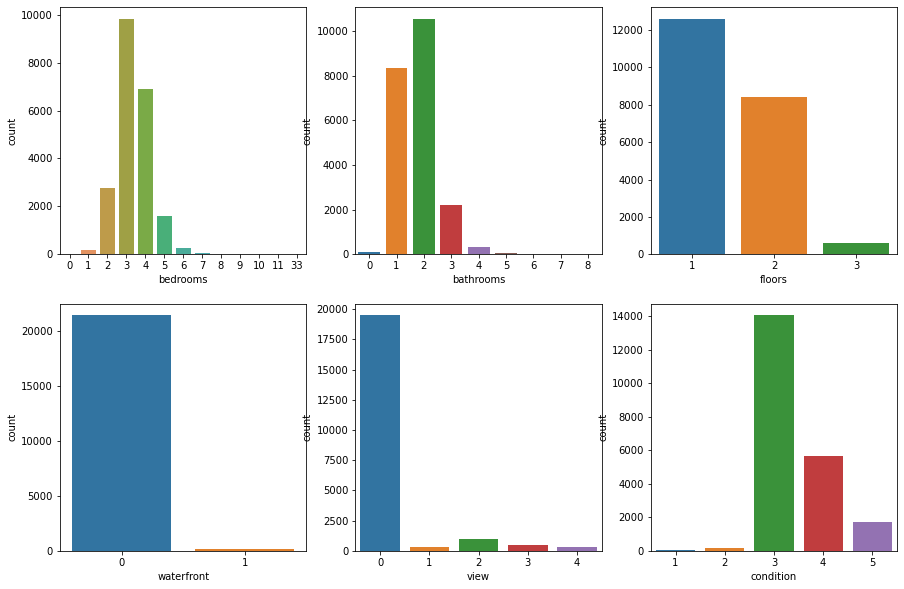

In [9]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
sns.countplot(x='bedrooms',data=data,ax=axes[0,0])
sns.countplot(x='bathrooms',data=data,ax=axes[0,1])
sns.countplot(x='floors',data=data,ax=axes[0,2])
sns.countplot(x='waterfront',data=data,ax=axes[1,0])
sns.countplot(x='view',data=data,ax=axes[1,1])
sns.countplot(x='condition',data=data,ax=axes[1,2])

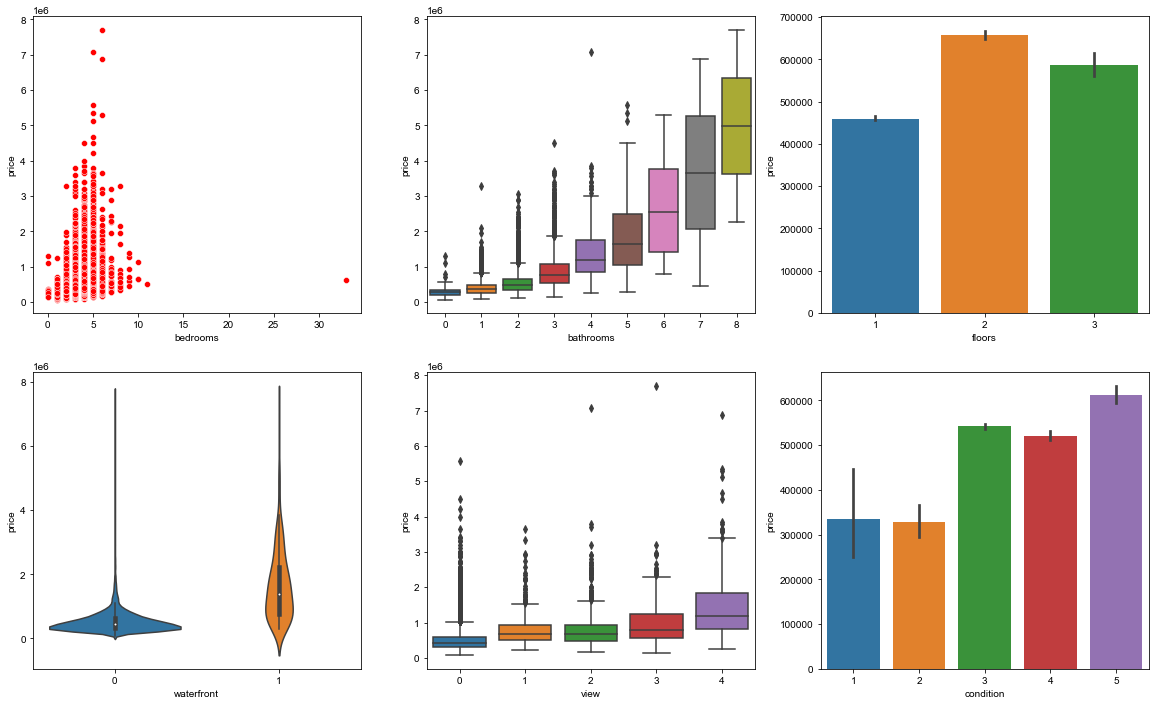

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,12))
sns.scatterplot(x='bedrooms',y='price',data=data,color='red',ax=axes[0,0])
sns.boxplot(x='bathrooms',y='price',data=data,ax=axes[0,1])
sns.barplot(x='floors',y='price',data=data,ax=axes[0,2])
sns.violinplot(x='waterfront',y='price',data=data,ax=axes[1,0])
sns.boxplot(x='view',y='price',data=data,ax=axes[1,1])
sns.barplot(x='condition',y='price',data=data,ax=axes[1,2])
sns.set_style('darkgrid')

<AxesSubplot:>

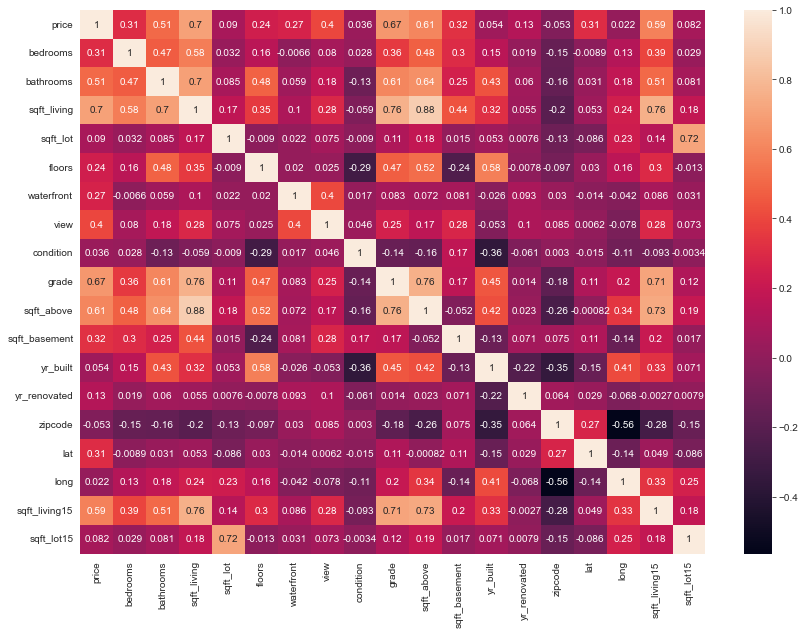

In [11]:
 plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)

In [12]:
train,test=train_test_split(data,test_size=0.30)

In [13]:
print('number of train samples:',test.shape[0])
print('number of test samples:',train.shape[0])

number of train samples: 6484
number of test samples: 15129


In [14]:
train_x=train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
train_y=train.price

test_x=test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
test_y=test.price

In [15]:
def evaluation(test_y,predct):
    mae=metrics.mean_absolute_error(test_y,predct)
    mse=metrics.mean_squared_error(test_y,predct)
    rmse=np.sqrt(metrics.mean_squared_error(test_y,predct))
    r_squared=metrics.r2_score(test_y,predct)
    return mae, mse, rmse, r_squared

Mean Absolute Error : 128951.61863463055
Mean Squared Error : 42007662810.6568
Root Mean Squared Error : 204957.70981023574
R2 Score : 0.6973260741381204


<AxesSubplot:xlabel='price'>

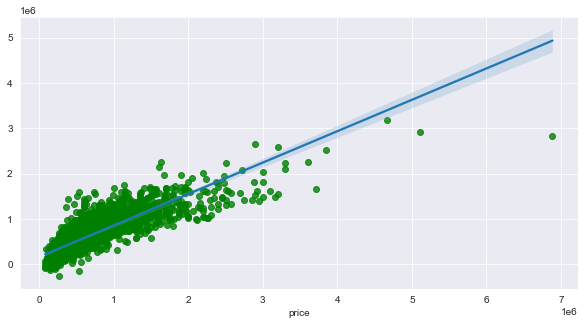

In [16]:
linear=LinearRegression()
linear.fit(train_x,train_y)
predct=linear.predict(test_x)
mae, mse, rmse, r_squared = evaluation(test_y,predct)
print('Mean Absolute Error :',mae)
print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)
print('R2 Score :',r_squared)
#Regression Graph
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})

Mean Absolute Error : 128904.90867507516
Mean Squared Error : 41990638896.60139
Root Mean Squared Error : 204916.17529273132
R2 Score : 0.6974487349708336


<AxesSubplot:xlabel='price'>

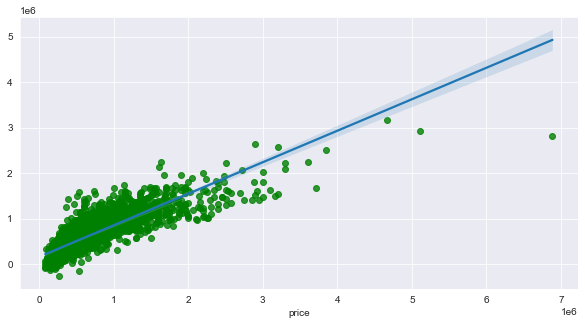

In [17]:
ridge=Ridge()
ridge.fit(train_x,train_y)
predct=ridge.predict(test_x)
mae, mse, rmse, r_squared = evaluation(test_y,predct)
print('Mean Absolute Error :',mae)
print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)
print('R2 Score :',r_squared)

#Regression Graph
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.706e+14, tolerance: 2.013e+11
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error : 128949.50902021294
Mean Squared Error : 42007180746.952194
Root Mean Squared Error : 204956.53379912578
R2 Score : 0.6973295475071257


<AxesSubplot:xlabel='price'>

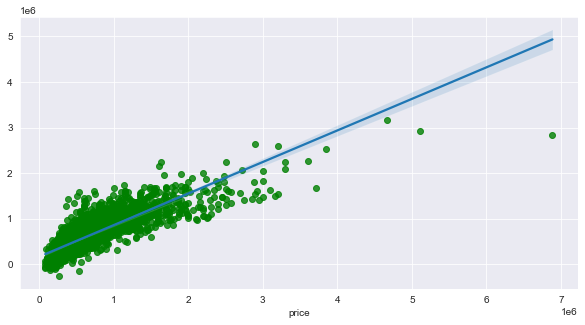

In [18]:
lasso=Lasso()
lasso.fit(train_x,train_y)
predct=lasso.predict(test_x)
mae, mse, rmse, r_squared = evaluation(test_y,predct)
print('Mean Absolute Error :',mae)
print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)
print('R2 Score :',r_squared)

#Regression Graph
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})

Mean Absolute Error : 102198.09307526218
Mean Squared Error : 35466117776.91105
Root Mean Squared Error : 188324.50126553117
R2 Score : 0.7444592632776937


<AxesSubplot:xlabel='price'>

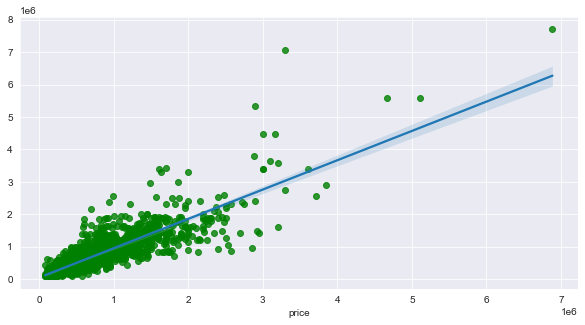

In [19]:
tree=DecisionTreeRegressor()
tree.fit(train_x,train_y)
predct=tree.predict(test_x)
mae, mse, rmse, r_squared = evaluation(test_y,predct)
print('Mean Absolute Error :',mae)
print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)
print('R2 Score :',r_squared)

#Regression Graph
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})

Mean Absolute Error : 69797.84551956465
Mean Squared Error : 16399567457.18229
Root Mean Squared Error : 128060.79594154602
R2 Score : 0.881837714060044


<AxesSubplot:xlabel='price'>

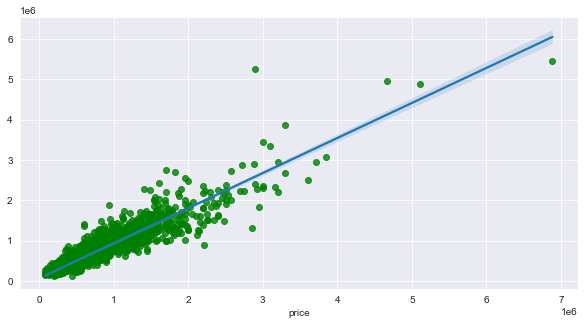

In [20]:
RFR=RandomForestRegressor()
RFR.fit(train_x,train_y)
predct=RFR.predict(test_x)
mae, mse, rmse, r_squared = evaluation(test_y,predct)
print('Mean Absolute Error :',mae)
print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)
print('R2 Score :',r_squared)

#Regression Graph
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})

Mean Absolute Error : 77958.28623619721
Mean Squared Error : 18486524569.20552
Root Mean Squared Error : 135965.15939462403
R2 Score : 0.8668007550878539


<AxesSubplot:xlabel='price'>

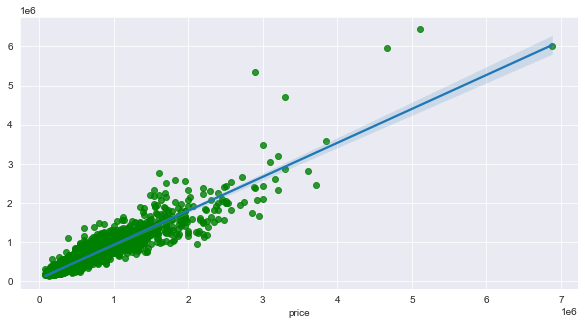

In [21]:
GBR=GradientBoostingRegressor()
GBR.fit(train_x,train_y)
predct=GBR.predict(test_x)
mae, mse, rmse, r_squared = evaluation(test_y,predct)
print('Mean Absolute Error :',mae)
print('Mean Squared Error :',mse)
print('Root Mean Squared Error :',rmse)
print('R2 Score :',r_squared)

#Regression Graph
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})